<h1 align=center><font size = 5> Data Analysis and Visualization via Area Plots, Histograms, and Bar Plots</font></h1>

# Introduction

In this notebook, a dataset regarding livestock production index will be analyzed and visualized 

## Exploring Datasets with pandas and Matplotlib

Data wrangling, analysis, and visualization will be carried out through pandas, Numpy and Matplotlib. The primary plotting library that we are exploring is Matplotlib.

Dataset: Livestock Production Index from 1961 to 2016 for almost all the countries and regions in the world. Dataset is extracted from World Bank database. 

## Downloading and Prepping Data

Importing Primary Modules. 
The first thing we'll do is import two key data analysis modules: pandas and Numpy.

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Let's import our primary dataset using pandas read_excel()

In [5]:
df_livestock = pd.read_excel('livestock.xls')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's take a look at the first five items in our dataset.

In [6]:
df_livestock.head()

,Country Name,Indicator Name,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,Livestock production index (2004-2006 = 100),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Livestock production index (2004-2006 = 100),43.370000,43.990000,47.030000,48.560000,51.430000,56.970000,60.260000,64.810000,...,94.800000,98.86000,101.920000,105.450000,107.940000,109.260000,103.970000,101.710000,98.90,98.70
2,Angola,Livestock production index (2004-2006 = 100),37.120000,38.130000,39.000000,41.330000,42.980000,44.050000,45.060000,44.910000,...,109.650000,114.56000,116.540000,123.190000,126.280000,130.470000,137.030000,137.330000,139.12,139.14
3,Albania,Livestock production index (2004-2006 = 100),24.080000,24.440000,24.450000,24.090000,24.980000,25.850000,29.090000,27.470000,...,103.570000,97.48000,98.990000,101.020000,104.660000,108.270000,110.780000,111.070000,111.72,113.07
4,Arab World,Livestock production index (2004-2006 = 100),20.603508,20.777659,21.336565,21.883884,22.879005,23.857694,24.490675,25.703691,...,108.946319,111.06782,112.101135,115.575549,119.481536,106.525665,107.117924,108.470263,NaN,NaN


Let's find out how many entries there are in our dataset.

In [7]:
# print the dimensions of the dataframe
print(df_livestock.shape)

(263, 58)


As we have noticed from the first five rows that there are some null values and a column 'Indicator Name' which we won't need for analysis as we already know that this data is for livestock production index. So, let's clean the data

### Data Cleaning

remove columns that are not informative to us i.e. Indicator Name

In [9]:
df_livestock.drop(['Indicator Name'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_livestock.head()

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,43.370000,43.990000,47.030000,48.560000,51.430000,56.970000,60.260000,64.810000,65.160000,...,94.800000,98.86000,101.920000,105.450000,107.940000,109.260000,103.970000,101.710000,98.90,98.70
2,Angola,37.120000,38.130000,39.000000,41.330000,42.980000,44.050000,45.060000,44.910000,46.850000,...,109.650000,114.56000,116.540000,123.190000,126.280000,130.470000,137.030000,137.330000,139.12,139.14
3,Albania,24.080000,24.440000,24.450000,24.090000,24.980000,25.850000,29.090000,27.470000,28.050000,...,103.570000,97.48000,98.990000,101.020000,104.660000,108.270000,110.780000,111.070000,111.72,113.07
4,Arab World,20.603508,20.777659,21.336565,21.883884,22.879005,23.857694,24.490675,25.703691,26.242326,...,108.946319,111.06782,112.101135,115.575549,119.481536,106.525665,107.117924,108.470263,NaN,NaN


We can drop the missing values from the rows.

In [10]:
df_livestock.dropna()

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Afghanistan,43.37,43.99,47.03,48.56,51.43,56.97,60.26,64.81,65.16,...,94.80,98.86,101.92,105.45,107.94,109.26,103.97,101.71,98.90,98.70
2,Angola,37.12,38.13,39.00,41.33,42.98,44.05,45.06,44.91,46.85,...,109.65,114.56,116.54,123.19,126.28,130.47,137.03,137.33,139.12,139.14
3,Albania,24.08,24.44,24.45,24.09,24.98,25.85,29.09,27.47,28.05,...,103.57,97.48,98.99,101.02,104.66,108.27,110.78,111.07,111.72,113.07
5,United Arab Emirates,11.63,11.67,11.95,12.32,12.63,12.93,13.13,13.80,14.34,...,99.85,117.76,126.42,142.49,145.34,152.70,156.89,161.74,159.82,149.90
6,Argentina,62.15,66.43,71.66,60.45,60.81,68.66,72.36,73.25,79.60,...,107.57,107.84,113.93,101.59,102.26,101.63,108.83,108.13,110.15,107.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Samoa,32.35,34.91,40.42,44.01,45.55,41.73,41.87,45.44,47.67,...,100.42,100.61,101.18,100.49,99.34,109.04,111.04,111.77,112.52,111.64
259,"Yemen, Rep.",27.95,28.01,28.33,28.68,29.20,28.48,29.16,26.40,23.71,...,109.19,124.75,133.89,139.29,150.40,157.26,159.08,160.80,157.77,157.93
260,South Africa,47.51,48.12,47.09,49.35,53.80,54.38,52.62,54.01,57.48,...,112.56,122.02,123.05,127.21,125.24,127.76,129.26,129.49,131.92,131.10
261,Zambia,23.60,23.54,24.21,25.34,26.57,28.17,29.20,31.00,31.16,...,103.68,118.21,144.81,165.70,168.29,179.99,197.26,196.97,201.68,200.58


#### For consistency, ensure that all column labels of type string

In [11]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_livestock.columns)

True

That's amazing. All the column labels are of type string

#### Set the country name as index - useful for quickly looking up countries using .loc method

In [21]:
df_livestock.set_index('Country Name', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_livestock.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,43.370000,43.990000,47.030000,48.560000,51.430000,56.970000,60.260000,64.810000,65.160000,59.480000,...,94.800000,98.86000,101.920000,105.450000,107.940000,109.260000,103.970000,101.710000,98.90,98.70
Angola,37.120000,38.130000,39.000000,41.330000,42.980000,44.050000,45.060000,44.910000,46.850000,50.010000,...,109.650000,114.56000,116.540000,123.190000,126.280000,130.470000,137.030000,137.330000,139.12,139.14
Albania,24.080000,24.440000,24.450000,24.090000,24.980000,25.850000,29.090000,27.470000,28.050000,29.030000,...,103.570000,97.48000,98.990000,101.020000,104.660000,108.270000,110.780000,111.070000,111.72,113.07
Arab World,20.603508,20.777659,21.336565,21.883884,22.879005,23.857694,24.490675,25.703691,26.242326,26.427973,...,108.946319,111.06782,112.101135,115.575549,119.481536,106.525665,107.117924,108.470263,NaN,NaN


#### Adding a total column

In [24]:
df_livestock['Total'] = df_livestock.sum(axis=1)

# let's view the first five elements and see how the dataframe was changed
df_livestock.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Afghanistan,43.370000,43.990000,47.030000,48.560000,51.430000,56.970000,60.260000,64.810000,65.160000,59.480000,...,98.86000,101.920000,105.450000,107.940000,109.260000,103.970000,101.710000,98.90,98.70,4384.360000
Angola,37.120000,38.130000,39.000000,41.330000,42.980000,44.050000,45.060000,44.910000,46.850000,50.010000,...,114.56000,116.540000,123.190000,126.280000,130.470000,137.030000,137.330000,139.12,139.14,4325.990000
Albania,24.080000,24.440000,24.450000,24.090000,24.980000,25.850000,29.090000,27.470000,28.050000,29.030000,...,97.48000,98.990000,101.020000,104.660000,108.270000,110.780000,111.070000,111.72,113.07,3520.000000
Arab World,20.603508,20.777659,21.336565,21.883884,22.879005,23.857694,24.490675,25.703691,26.242326,26.427973,...,111.06782,112.101135,115.575549,119.481536,106.525665,107.117924,108.470263,NaN,NaN,3199.119288


Notice how the country names now serve as indices.

In [22]:
# finally, let's create a list of years from 1961 - 2016
# this will come in handy when we start plotting the data
years = list(map(str, range(1961, 2016)))

years

['1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

## Visualizing Data using Matplotlib

Import Matplotlib and Numpy.

In [23]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.1.3


### Area Plots

we can visualize the data as a cumulative plot, also knows as a Stacked Line Plot or Area plot. 
Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0).

In [25]:
df_livestock.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_livestock.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country Name,Singapore,Bulgaria,Cayman Islands,Cuba,Guam
1961,439.58,114.76,NaN,98.06,116.23
1962,436.98,118.05,NaN,103.93,113.18
1963,430.66,115.96,NaN,108.93,158.03
1964,436.09,125.65,NaN,116.89,111.93
1965,458.96,141.89,NaN,122.62,136.65


To produce an unstacked plot, pass stacked=False.

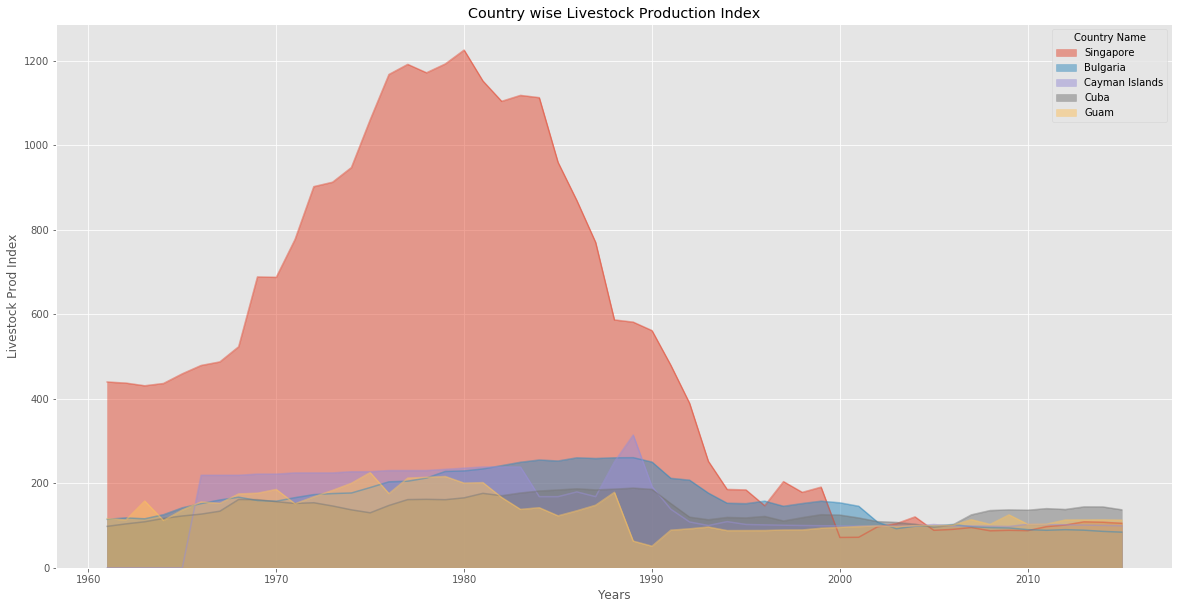

In [26]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Country wise Livestock Production Index')
plt.ylabel('Livestock Prod Index')
plt.xlabel('Years')

plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter.

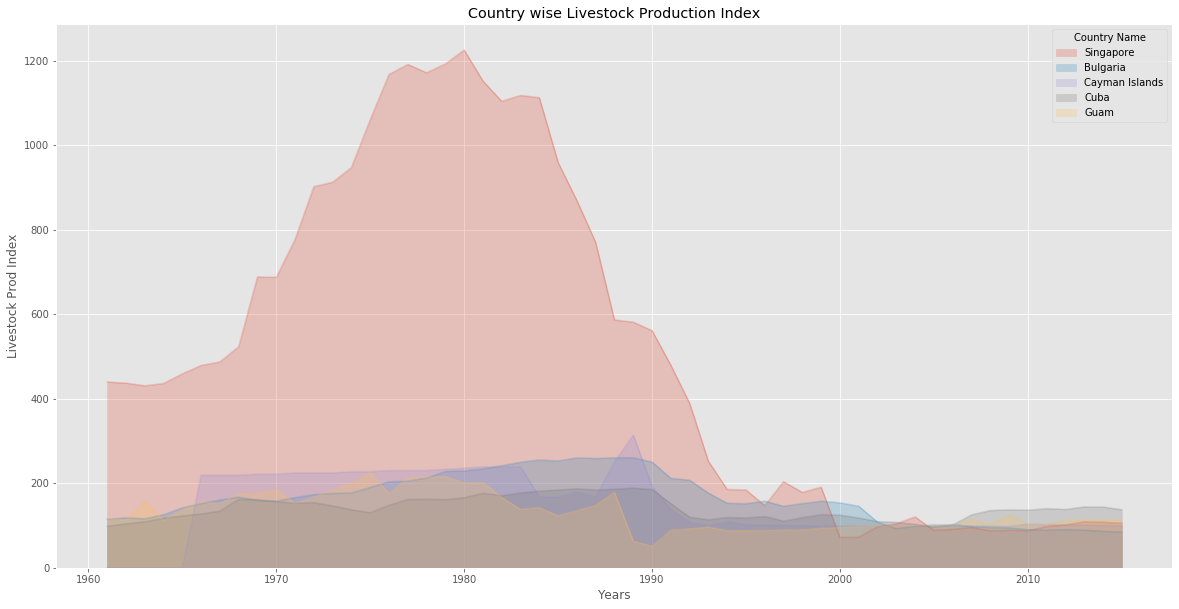

In [27]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Country wise Livestock Production Index')
plt.ylabel('Livestock Prod Index')
plt.xlabel('Years')

plt.show()

#### Different forms of plotting

There are two styles/options of ploting with matplotlib. Plotting using the Artist layer and plotting using the scripting layer.

##### *Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' *

We can use plt i.e. matplotlib.pyplot and add more elements by calling different methods procedurally; for example, plt.title(...) to add title or plt.xlabel(...) to add label to the x-axis.

##### *Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred) *

You can use an Axes instance of your current plot and store it in a variable (eg. ax). You can add more elements by calling methods with a little change in syntax (by adding "set_" to the previous methods). For example, using ax.set_title() instead of plt.title() to add title, or ax.set_xlabel() instead of plt.xlabel() to add label to the x-axis.

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots.

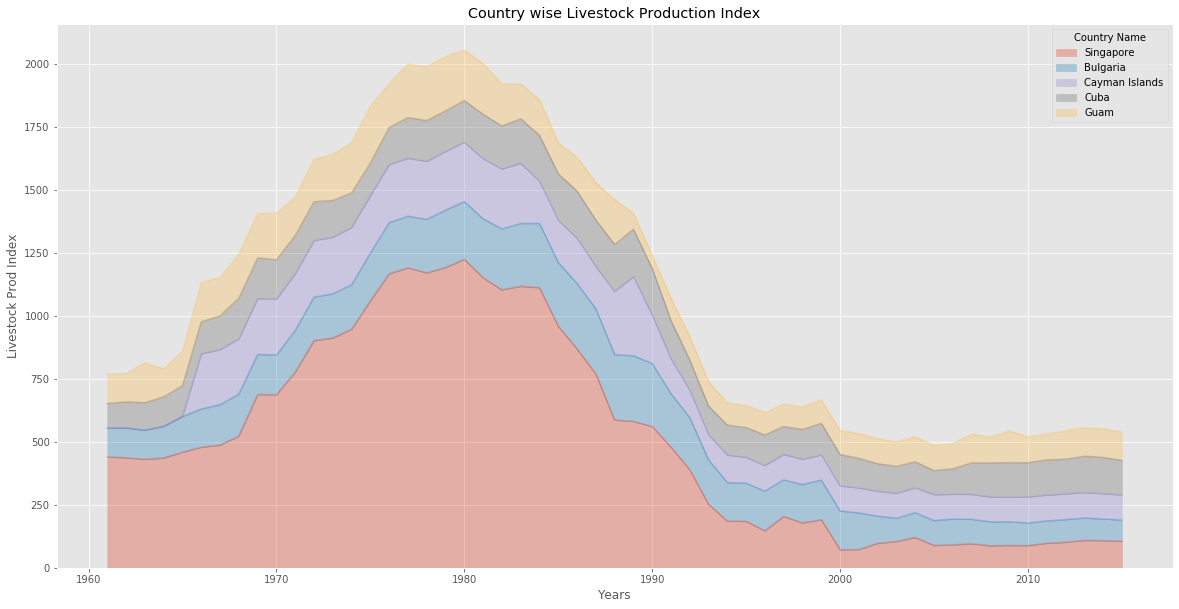

In [28]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))
plt.title('Country wise Livestock Production Index')
plt.ylabel('Livestock Prod Index')
plt.xlabel('Years')

plt.show()

In [31]:
Germany = df_livestock.loc['Germany', years] 
Germany.head()

1961    73.10
1962    74.39
1963    76.86
1964    78.85
1965    79.94
Name: Germany, dtype: float64

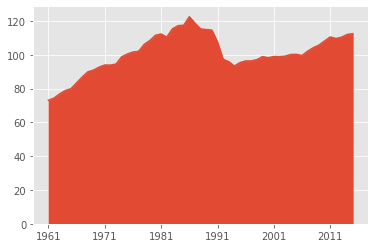

In [33]:
Germany.plot(kind ='area')

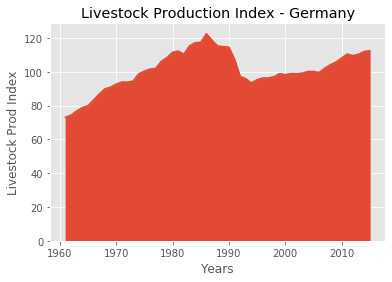

In [35]:
Germany.index = Germany.index.map(int) # let's change the index values of Haiti to type integer for plotting
Germany.plot(kind='area')

plt.title('Livestock Production Index - Germany')
plt.ylabel('Livestock Prod Index')
plt.xlabel('Years')

plt.show()

let's compare Germany to another country. For instance, France

In [36]:
df_FG = df_livestock.loc[['France', 'Germany'], years]
df_FG.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
France,70.77,71.12,71.67,70.64,74.10,75.03,79.33,81.82,80.34,81.41,...,97.56,98.48,100.22,98.91,101.58,102.35,102.20,102.48,103.27,104.09
Germany,73.10,74.39,76.86,78.85,79.94,83.40,86.88,89.93,90.92,92.71,...,99.58,102.15,104.20,105.74,108.19,110.54,109.64,110.40,112.02,112.54


In [37]:
# let's transpose the data to make a better looking plot
df_FG = df_FG.transpose()
df_FG.head()

Country Name,France,Germany
1961,70.77,73.10
1962,71.12,74.39
1963,71.67,76.86
1964,70.64,78.85
1965,74.10,79.94


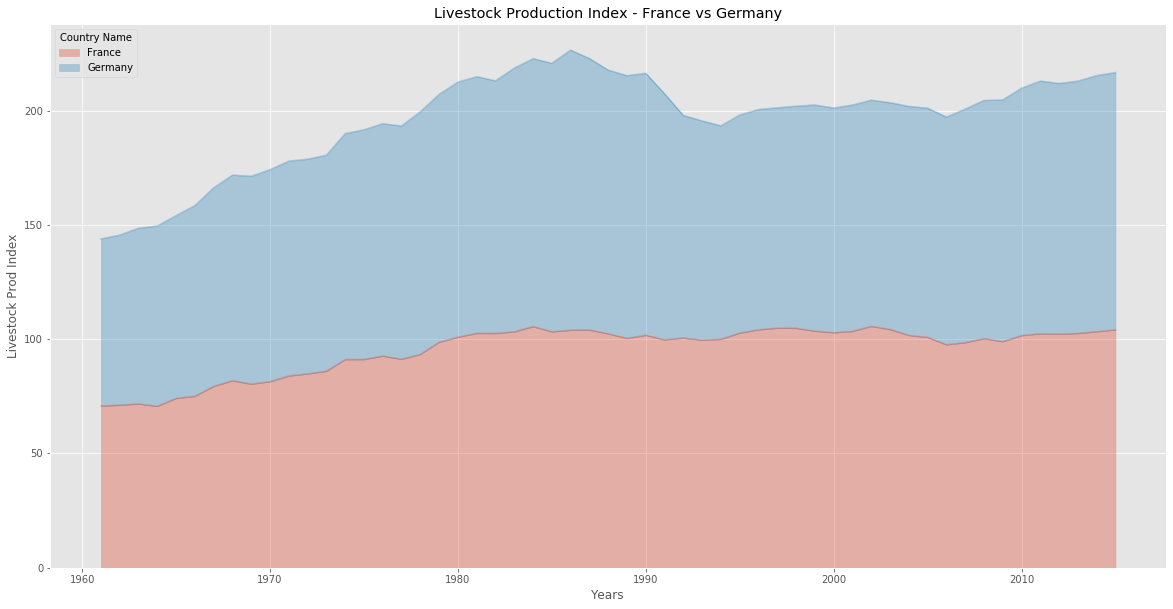

In [38]:
df_FG.index = df_FG.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_FG.plot(kind='area', alpha=0.35, figsize=(20, 10))

plt.title('Livestock Production Index - France vs Germany')
plt.ylabel('Livestock Prod Index')
plt.xlabel('Years')

plt.show()

### Histograms

A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. 

Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will use Numpy's histrogram method to get the bin ranges and frequency counts as follows:

In [48]:
# let's quickly view the 2010 data
df_livestock['2010'].head()

Country Name
Singapore          87.89
Bulgaria           90.28
Cayman Islands    103.07
Cuba              136.16
Guam              102.96
Name: 2010, dtype: float64

By default, the histrogram method breaks up the dataset into 10 bins.

Let's plot some data. Brazil v Pakistan

In [42]:
df_BP = df_livestock.loc[['Brazil', 'Pakistan'], years]
df_BP.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Brazil,13.67,13.97,14.12,15.15,16.01,16.11,16.48,17.99,18.87,19.32,...,102.81,107.66,111.44,111.31,116.56,118.80,121.38,127.45,128.25,127.94
Pakistan,19.84,20.43,20.95,21.56,22.08,22.37,22.90,23.50,24.14,24.75,...,106.06,109.66,113.38,117.39,121.71,126.03,130.42,135.06,137.85,140.97


In [43]:
# let's transpose the data to make a better looking plot
df_BP = df_BP.transpose()
df_BP.head()

Country Name,Brazil,Pakistan
1961,13.67,19.84
1962,13.97,20.43
1963,14.12,20.95
1964,15.15,21.56
1965,16.01,22.08


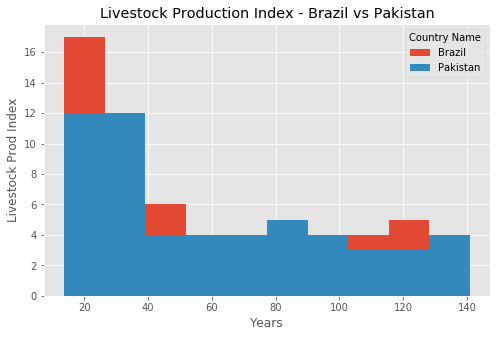

In [49]:
df_BP.index = df_BP.index.map(int)
df_BP.plot(kind='hist', figsize=(8, 5))

plt.title('Livestock Production Index - Brazil vs Pakistan')
plt.ylabel('Livestock Prod Index')
plt.xlabel('Years')

plt.show()

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a xticks keyword that contains the list of the bin sizes, as follows:

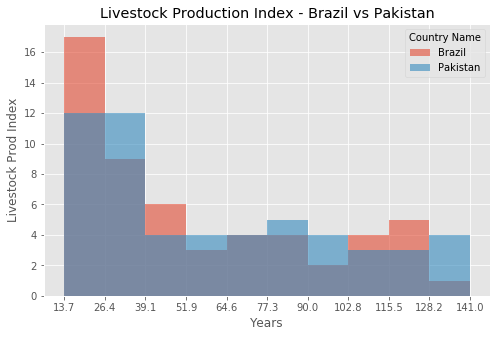

In [47]:
count, bin_edges = np.histogram(df_BP)
df_BP.index = df_BP.index.map(int) 
df_BP.plot(kind='hist', figsize=(8, 5), alpha=0.6, xticks=bin_edges)

plt.title('Livestock Production Index - Brazil vs Pakistan')
plt.ylabel('Livestock Prod Index')
plt.xlabel('Years')

plt.show()

### Bar Charts (Dataframe) 


A bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via kind parameter in plot():

kind=bar creates a vertical bar plot
kind=barh creates a horizontal bar plot

#### Vertical bar plot

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particuarly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

Let's compare the livestock production index for Denmark (country = 'Denmark') from year 1961 to 2016.

In [50]:
# step 1: get the data
df_denmark = df_livestock.loc['Denmark', years]
df_denmark.head()

1961    69.91
1962    70.68
1963    69.82
1964    69.82
1965    72.26
Name: Denmark, dtype: float64

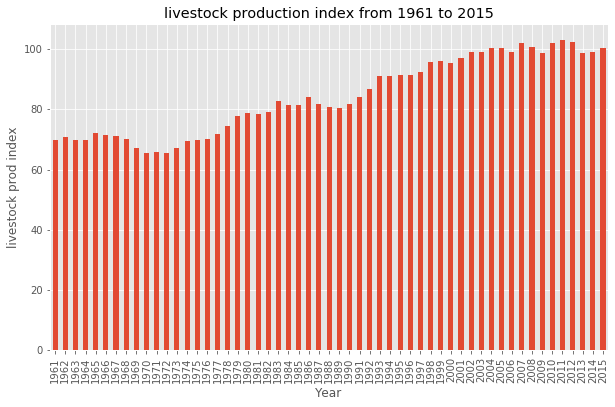

In [52]:
# step 2: plot data
df_denmark.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('livestock prod index') # add y-label to the plot
plt.title('livestock production index from 1961 to 2015') # add title to the plot

plt.show()

The bar plot above shows livestock production index broken down by each year.

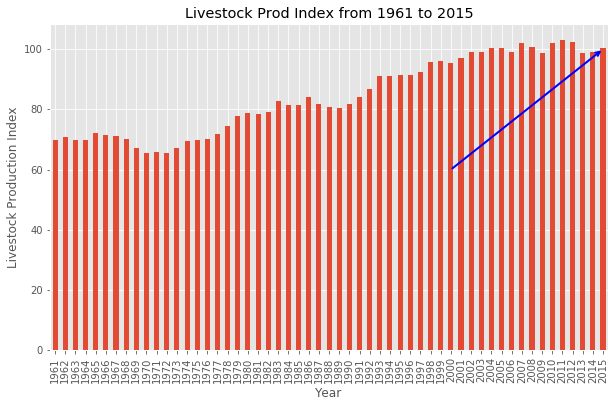

In [56]:
df_denmark.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Livestock Production Index')
plt.title('Livestock Prod Index from 1961 to 2015')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(54, 100),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(39, 60),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

the arrow shows the rise in livestock production index from during the years 1999 to 2015

#### Horizontal Bar Plot

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. 

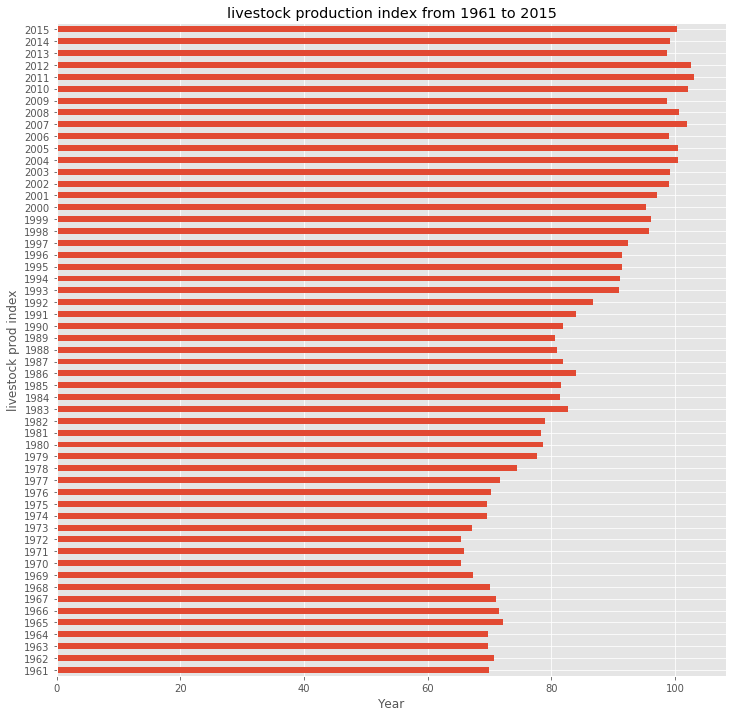

In [58]:
# plotting the above data on a horizantal graph
df_denmark.plot(kind='barh', figsize=(12, 12))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('livestock prod index') # add y-label to the plot
plt.title('livestock production index from 1961 to 2015') # add title to the plot

plt.show()